In [234]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import scipy.stats as stats

#make it standart and draw a sample 
mu, sigma = 0, 1 
sample = np.random.normal(mu, sigma, 10_000)

trials = 10_000
n_simulated = []
n_calculated = []

for i in range(trials): 
    #choose random heights for all family 
    f = np.random.choice(sample)
    m = np.random.choice(sample)
    x1 = np.random.choice(sample)
    x2 = np.random.choice(sample)
    x3 = np.random.choice(sample)
    children = [x1,x2,x3]
    count = 0
    #check the number of children higher than parents 
    for j in children: 
        if j > max(f,m):
            count+=1
    n_simulated.append(count)
    n_calculated.append(3*norm.cdf(max(f,m), mu, sigma)**3)
    
#calculate the total number of children that are higher than parents    
ch1 = n_simulated.count(1)
ch2 = n_simulated.count(2)*2 
ch3 = n_simulated.count(3)*3
total_num_higher = ch1+ch2+ch3

#divide the total number by the number of cases to find the average number per case 
r = total_num_higher/trials
r2 = np.mean(n_calculated)

print("Simulated average number of children taller than parents is ", round(r,2))
print("Calculated average number of children taller than parents is ", round(r2,2))





Simulated average number of children taller than parents is  1.0
Calculated average number of children taller than parents is  1.19


In [145]:
probabilities = np.linspace(0, 0.9999, 1000)
result = []
result_calc = []

for i in range(len(probabilities)):
    p = probabilities[i]
    mean = [0,0,0,0,0] 
    cov = [[1, 0, p, p, p], 
           [0, 1, 0, 0, 0],
           [p, 0, 1, 0, 0],
           [p, 0, 0, 1, 0],
           [p, 0, 0, 0, 1]]
    samples = np.random.multivariate_normal(mean, cov, size=10000)

    # count the number of children taller than their mother
    #next 2 lines of code are created using chat GPT
    height_diff = samples[:, 2:5] - samples[:, 0].reshape(-1, 1)
    count = np.sum(height_diff > 1, axis=1)
    result.append(np.mean(count))
    
    #analytical result calculations 
    k = 1 / (2 * (1 + p))
    cdf = 1 - stats.norm.cdf(k)
    result_calc.append(cdf)



print("Simulated result: {} of the children are 1+ cm higher than their mother.".format(round(np.mean(result),2)))
print("Calculated result: {} of the children are 1+ cm higher than their mother.".format(round(np.mean(result_calc),2)))



/var/folders/k_/yc0ykmqs4l725qknvzyg0mmc0000gn/T/ipykernel_78842/3508212010.py:16: RuntimeWarning: covariance is not positive-semidefinite.
  samples = np.random.multivariate_normal(mean, cov, size=10000)


Simulated result: 0.58 of the children are 1+ cm higher than their mother.
Calculated result: 0.36 of the children are 1+ cm higher than their mother.


In [182]:
# Define the parameters
lam1 = 1000  
lam2 = 740
p_f = 0.2 
p_f_b = 0.5 
p_if = 0.8 
p_if_b = 0.2

trials = 1_000_000
non_buyers = []
theoretical_non_buyers = []

for i in range(trials):
    #generating distribution for all the visitors and the distributino accorsing to theoretical result 
    n_visitors = np.random.poisson(lam1)
    theoretical_n = np.random.poisson(lam2)
    
    #se the initial values 
    n_buyers = 0
    is_frequent = False 
    
    for i in range(n_visitors):
        #check if frequent 
        if np.random.uniform() < p_f:
            is_frequent = True 
            #check if buy 
            if np.random.uniform() < p_f_b:
                n_buyers += 1
        #not frequent 
        else: 
            #check if buy 
            if np.random.uniform() < p_if_b:
                n_buyers += 1
                
    #get the list of theoretical and simulated results conditioned on n_buyers = 300
    if n_buyers == 300: 
        theoretical_non_buyers.append(theoretical_n)
        non_buyers.append(n_visitors - 300)

In [183]:
print('sample size is ',len(theoretical_non_buyers))
print('Average number of non buyers calculated theoretically is ',np.mean(theoretical_non_buyers))
print('Average number of non buyers calculated using simulation is ',np.mean(non_buyers))



sample size is  1226
Average number of non buyers calculated theoretically is  739.2438825448613
Average number of non buyers calculated using simulation is  740.8482871125611


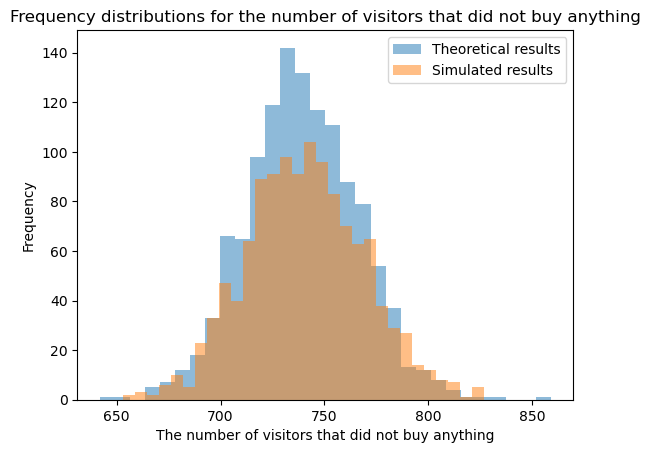

In [184]:
plt.hist(theoretical_non_buyers, bins=30,alpha = 0.5, label = "Theoretical results")
plt.hist(non_buyers, bins=30,alpha = 0.5,label = "Simulated results")
plt.legend()
plt.title('Frequency distributions for the number of visitors that did not buy anything')
plt.xlabel('The number of visitors that did not buy anything')
plt.ylabel('Frequency')
plt.show()

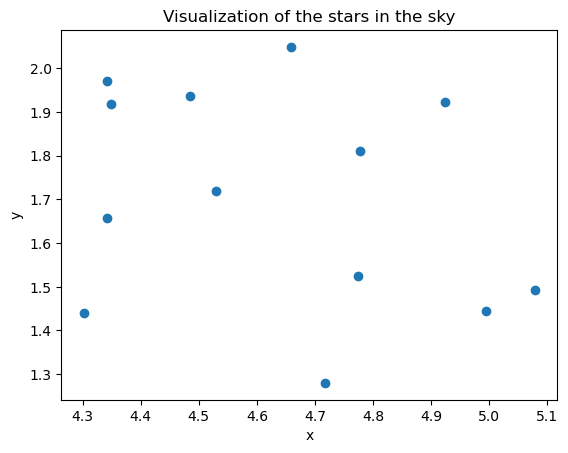

Mean: [4.63615385 1.70507692]
Standard deviation: [0.25674496 0.23954266]


In [699]:
import numpy as np
import matplotlib.pyplot as plt

# Data
stars = [[5.079, 1.493], [4.341, 1.657], [4.777, 1.811], [4.717, 1.280], [4.484, 1.936],
         [4.995, 1.444], [4.924, 1.922], [4.530, 1.720], [4.774, 1.525], [4.658, 2.049],
         [4.302, 1.439], [4.341, 1.971], [4.348, 1.919]]

x = [p[0] for p in stars]
y = [p[1] for p in stars]

plt.scatter(x, y,)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Visualization of the stars in the sky')
plt.show()

mean = np.mean(data, axis=0)
print("Mean:", mean)

std = np.std(data, axis=0)
print("Standard deviation:", std)


In [700]:
x_dist = []
y_dist = []
for i in range(len(data)): 
    x_dist.append(data[i][0])
    y_dist.append(data[i][1])
    
    
# Estimate the center of the window
x_mean = mean[0]
y_mean = mean[1]
print("Estimated center: {},{}".format(x_mean,y_mean))

Estimated center: 4.636153846153847,1.7050769230769232


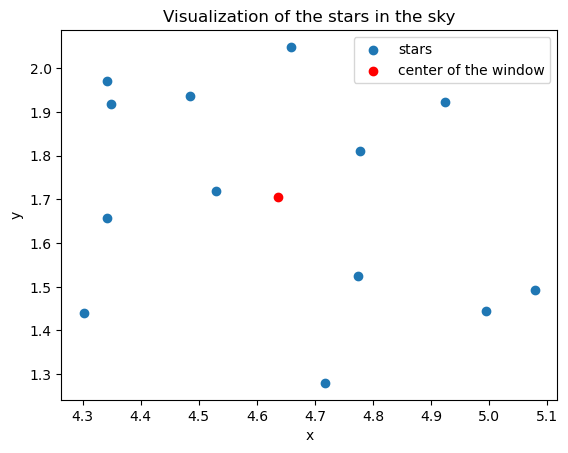

In [701]:
plt.scatter(x, y, label = 'stars')
plt.scatter(4.63615385, 1.70507692, color = 'r',label = 'center of the window')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Visualization of the stars in the sky')
plt.legend()
plt.show()


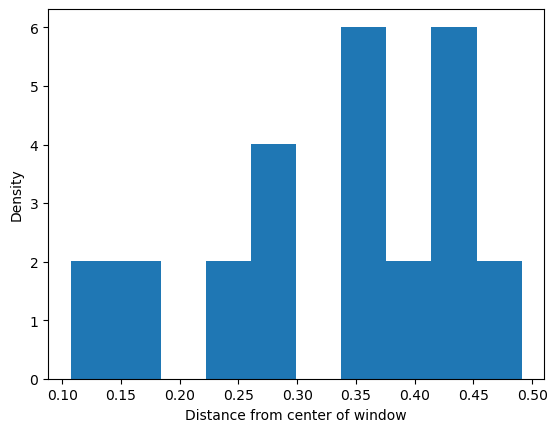

In [484]:
# Compute the distances from the center of the window
distances = np.sqrt((data[:, 0] - x_mean)**2 + (data[:, 1] - y_mean)**2)

plt.hist(distances, density=True)
plt.xlabel('Distance from center of window')
plt.ylabel('Density')
plt.show()

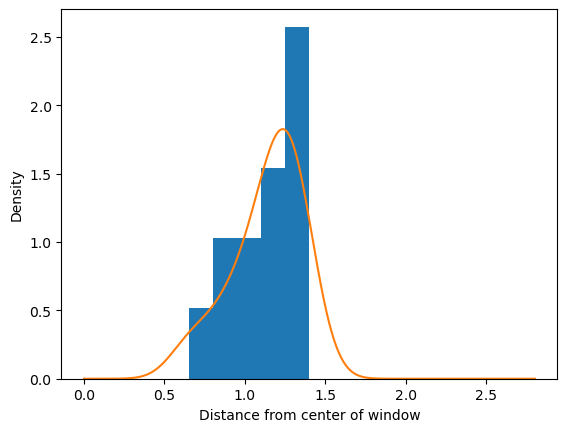

In [485]:
from scipy.stats import gaussian_kde

def calculate_density(distances):
    #code adapted from chat GPT
    # Calculate the side length of the window
    side_length = np.sqrt(distances) * 2
    # Fit a kernel density estimate to the distances
    kde = gaussian_kde(side_length)
    # Evaluate the density estimate on a grid of values
    x_grid = np.linspace(0, max(side_length * 2), 1000)
    density = kde(x_grid)
    return x_grid, density,side_length
x_grid, density, side_length = calculate_density(distances)


# Plot the histogram and fitted distribution
plt.hist(side_length, density=True, bins=5)
plt.plot(x_grid, density)
plt.xlabel('Distance from center of window')
plt.ylabel('Density')
plt.show()


In [486]:
# Generate random x and y coordinates within the range of the given data
n = 1000000

min_x = min([star[0] for star in stars])
max_x = max([star[0] for star in stars])
min_y = min([star[1] for star in stars])
max_y = max([star[1] for star in stars])

x_samples = np.random.uniform(min_x, max_x, size=n)
y_samples = np.random.uniform(min_y, max_y, size=n)

In [487]:
def get_max_distance(stars, x_samples, y_samples):
    max_distance = 0
    min_distance = 100
    for star in stars:
        # Calculate the distance using the Pythagorean theorem
        distance = ((star[0] - x_samples[0]) ** 2 + (star[1] - y_samples[0]) ** 2) ** 0.5
        if distance > max_distance:
            max_distance = distance
        if distance < min_distance:
            min_distance = distance
    return max_distance, min_distance

max_distance, min_distance = get_max_distance(stars, x_samples, y_samples)



In [488]:
def get_side_lengths(min_distance, max_distance, n):
    side_length_samples = []
    for i in range(n):
        side_length = np.random.uniform(min_distance, max_distance)
        side_length_samples.append(side_length)
    return side_length_samples
    
side_length_samples = get_side_lengths(min_distance,max_distance, n)



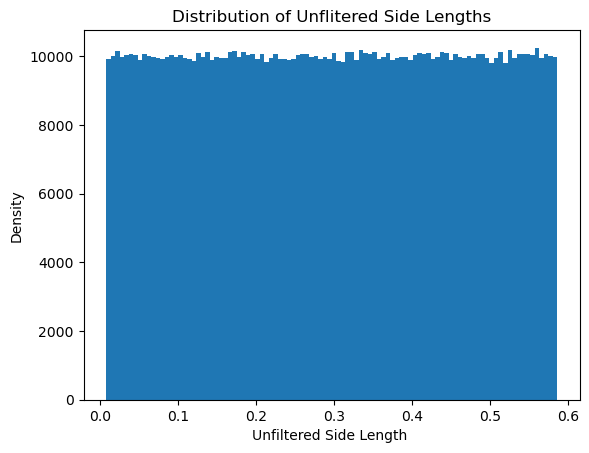

In [489]:
# Plot the histogram of side lengths
plt.hist(side_length_samples, bins=100)
plt.xlabel('Unfiltered Side Length ')
plt.ylabel('Density')
plt.title('Distribution of Unflitered Side Lengths')
plt.show()


In [490]:
def get_filtered_windows(x_samples, y_samples, side_length_samples, stars):
    filtered_windows = []
    for i in range(len(x_samples)):
        x = x_samples[i]
        y = y_samples[i]
        s = side_length_samples[i]
        window = [[x-s/2, y-s/2], [x-s/2, y+s/2], [x+s/2, y+s/2], [x+s/2, y-s/2]]
        
        stars_in_window = True
        for star in stars:
            if star[0] < window[0][0] or star[0] > window[2][0] or star[1] < window[0][1] or star[1] > window[2][1]:
                stars_in_window = False
                break
        
        if stars_in_window:
            filtered_windows.append(window)
    
    return filtered_windows


filtered_windows = get_filtered_windows(x_samples, y_samples, side_length_samples, stars)


In [491]:
def get_side_length_samples(n, max_distance,min_distance):
    side_length_samples = []
    for i in range(n):
        side_length = np.random.uniform(min_distance, max_distance)
        side_length_samples.append(side_length)
    return side_length_samples


side_length_samples = get_side_length_samples(n, max_distance,min_distance)


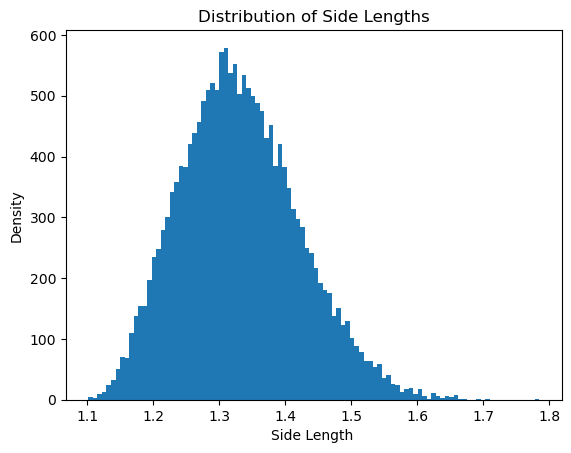

In [492]:
plt.hist(filtered_side_lengths, bins=100)
plt.xlabel('Side Length ')
plt.ylabel('Density')
plt.title('Distribution of Side Lengths')
plt.show()


In [698]:
print(np.mean(filtered_side_lengths))

1.3315495079259694


In [536]:
stars = [[5.079, 1.493], [4.341, 1.657], [4.777, 1.811], [4.717, 1.280], [4.484, 1.936],
         [4.995, 1.444], [4.924, 1.922], [4.530, 1.720], [4.774, 1.525], [4.658, 2.049],
         [4.302, 1.439], [4.341, 1.971], [4.348, 1.919]]

x = [p[0] for p in stars]
y = [p[1] for p in stars]


x_min = min(x)  
x_max = max(x)
y_min = min(y)  
y_max = max(y) 

print('x_min = ', min(x), 'x_max = ', max(x), 'y_min = ', min(y), 'y_max = ', max(y))




x_min =  4.302 x_max =  5.079 y_min =  1.28 y_max =  2.049


In [663]:
distances = []
for i in range(len(data)):
    for j in range(i+1, len(data)):
        distances.append(np.sqrt((data[i][0]-data[j][0])**2 + (data[i][1]-data[j][1])**2))

s_min = np.max(distances)

In [664]:
def x_prior():
    return np.random.uniform(low=x_min, high=x_max)
def y_prior():
    return np.random.uniform(low=y_min, high=y_max)
def s_prior():
    return np.random.uniform(low=s_min, high=s_min*1.5)

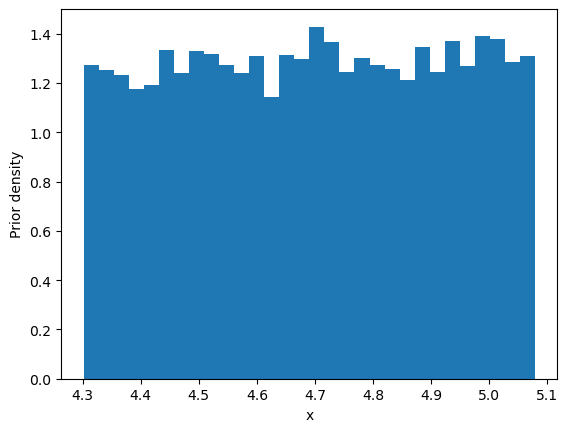

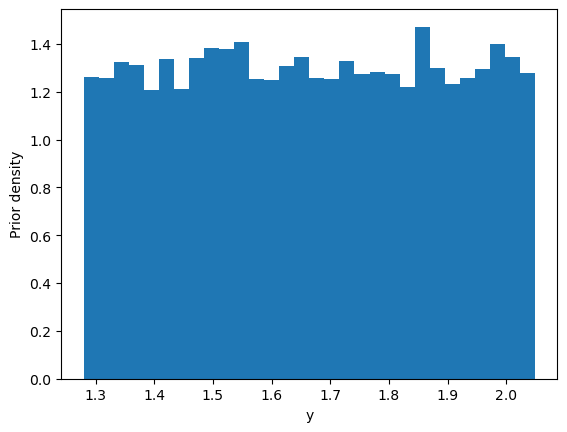

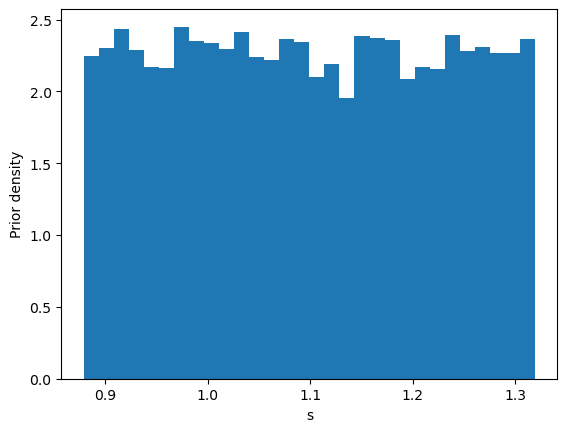

In [665]:
import numpy as np
import matplotlib.pyplot as plt

# Set the number of samples
n = 10000

# Sample from the priors
x_prior_samples = np.array([x_prior() for i in range(n)])
y_prior_samples = np.array([y_prior() for i in range(n)])
s_prior_samples = np.array([s_prior() for i in range(n)])


plt.hist(x_prior_samples, bins=30, density=True)
plt.xlabel("x")
plt.ylabel("Prior density")
plt.show()

plt.hist(y_prior_samples, bins=30, density=True)
plt.xlabel("y")
plt.ylabel("Prior density")
plt.show()

plt.hist(s_prior_samples, bins=30, density=True)
plt.xlabel("s")
plt.ylabel("Prior density")
plt.show()


In [666]:
from sympy import integrate
from sympy.abc import x,y,s,symbols

#def bounds 
bx = (x, 4.302 + s/2, 5.079 - s/2)
by = (y,1.28 + s/2, 2.049 - s/2)
#divide expression into 3 
p1 = 1/(s**26)
p2 = 1/(5.079+s/2 -4.302-s/2)
p3 = 1/(2.049+s/2 -1.28-s/2)

intgr1 = integrate((p1*p2),bx)
likelihood_intgr = integrate((intgr1*p3),by)

def likelihood(S):
    numerator = likelihood_intgr
    lk = (numerator.subs(s, S).doit())
    return lk

In [693]:
s_prior = np.random.uniform(low=s_min, high=s_min*1.5)
lk = likelihood(s_prior)
lk

0.291371636665557

In [694]:
posterior_s = lk*x_prior_samples*y_prior_samples
float_posterior_s = [float(i) for i in posterior_s]

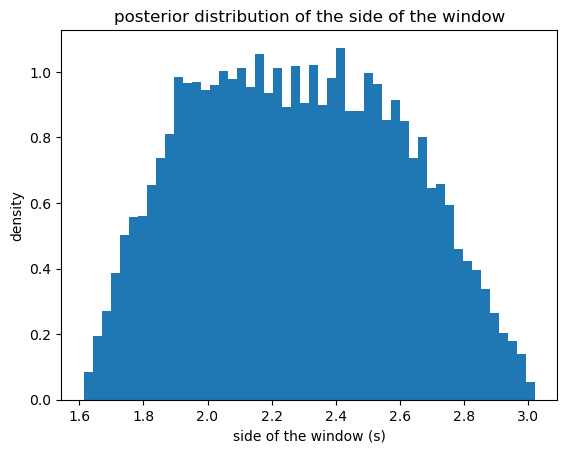

In [695]:
plt.hist(float_posterior_s, bins = 50, density = True)
plt.title('posterior distribution of the side of the window')
plt.ylabel('density')
plt.xlabel('side of the window (s)')
plt.show()

In [697]:
print(np.mean(float_posterior_s))

2.2782175670284732
